In [1]:
import sys
import os
import torch
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

#For safe imports of everything
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
sys.path.insert(False, parent_directory)

#Global params
train_pct = 0.9

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### **English LLM Model** ###

✔ Starting training...
Epoch: 1 Training Loss: 2.1074 Test Loss: 2.1565 Train Accuracy 0.39 Test Accuracy 0.3938
Epoch: 2 Training Loss: 1.6968 Test Loss: 1.7463 Train Accuracy 0.5013 Test Accuracy 0.5064
Epoch: 3 Training Loss: 1.5145 Test Loss: 1.5896 Train Accuracy 0.5494 Test Accuracy 0.5476
Epoch: 4 Training Loss: 1.412 Test Loss: 1.5156 Train Accuracy 0.5755 Test Accuracy 0.5684
Epoch: 5 Training Loss: 1.3423 Test Loss: 1.4709 Train Accuracy 0.593 Test Accuracy 0.5809
Epoch: 6 Training Loss: 1.2951 Test Loss: 1.4436 Train Accuracy 0.6063 Test Accuracy 0.5904
Epoch: 7 Training Loss: 1.26 Test Loss: 1.4261 Train Accuracy 0.6156 Test Accuracy 0.5963
Epoch: 8 Training Loss: 1.2331 Test Loss: 1.4164 Train Accuracy 0.6226 Test Accuracy 0.6005
Epoch: 9 Training Loss: 1.2152 Test Loss: 1.4149 Train Accuracy 0.6281 Test Accuracy 0.6037
Epoch: 10 Training Loss: 1.2018 Test Loss: 1.419 Train Accuracy 0.6325 Test Accuracy 0.6066
Epoch: 11 Training Loss: 1.186 Test Loss: 1.4174 Train Accuracy

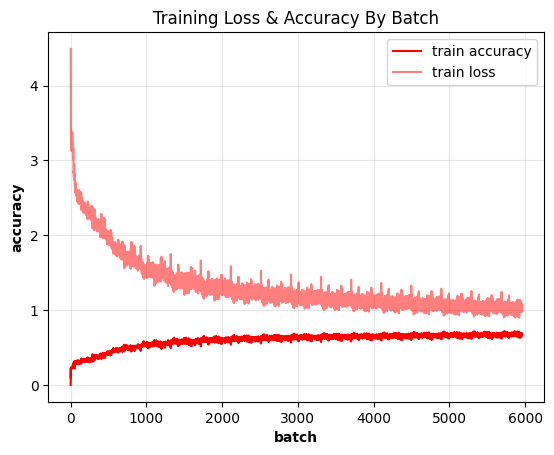

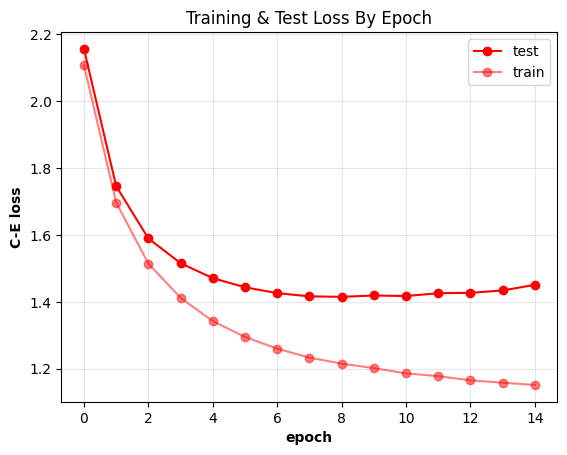

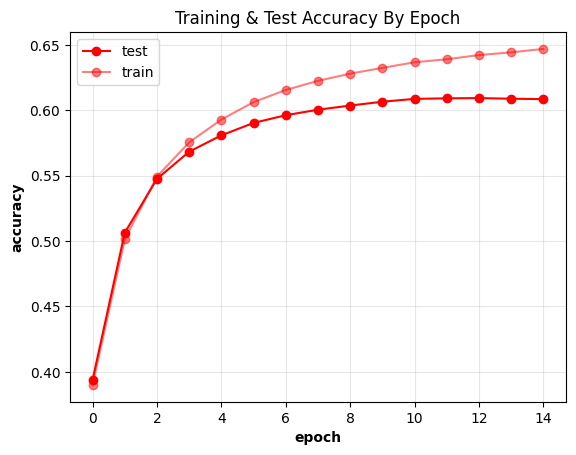

In [8]:
from data.data import createBatchTensor
from model.GPT import transformerModel
from config import modelConfig

config = modelConfig()
train, test = createBatchTensor(train_pct, config)

model = transformerModel(config)
model.to(device)

model.trainModel(train, test)

**Testing the model**

Results look coherent enough to be compared with the morse LLM.

In [20]:
from data.tokenizer import detokenize

print(detokenize(model.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=190).tolist()[0], config))


    What have look'd with all this tokeness?
    Lavinia, Embracefor this thilt live,
    That an 'gainst and cheek all hence to heaven.
    The day entreaties is a gentleman,
    And all ye


### **Morse LLM Model** ###

✔ Starting training...
Epoch: 1 Training Loss: 1.0147 Test Loss: 1.0382 Train Accuracy 0.4499 Test Accuracy 0.4578
Epoch: 2 Training Loss: 0.9181 Test Loss: 0.9415 Train Accuracy 0.5393 Test Accuracy 0.5486
Epoch: 3 Training Loss: 0.754 Test Loss: 0.7744 Train Accuracy 0.6313 Test Accuracy 0.6433
Epoch: 4 Training Loss: 0.6085 Test Loss: 0.623 Train Accuracy 0.7102 Test Accuracy 0.7251
Epoch: 5 Training Loss: 0.5424 Test Loss: 0.5592 Train Accuracy 0.745 Test Accuracy 0.7589
Epoch: 6 Training Loss: 0.5073 Test Loss: 0.5274 Train Accuracy 0.7639 Test Accuracy 0.7768
Epoch: 7 Training Loss: 0.4791 Test Loss: 0.5054 Train Accuracy 0.7785 Test Accuracy 0.7897
Epoch: 8 Training Loss: 0.4567 Test Loss: 0.4882 Train Accuracy 0.789 Test Accuracy 0.7987
Epoch: 9 Training Loss: 0.4425 Test Loss: 0.4773 Train Accuracy 0.7962 Test Accuracy 0.8049
Epoch: 10 Training Loss: 0.4281 Test Loss: 0.4636 Train Accuracy 0.8033 Test Accuracy 0.8118
Epoch: 11 Training Loss: 0.416 Test Loss: 0.4551 Train Accur

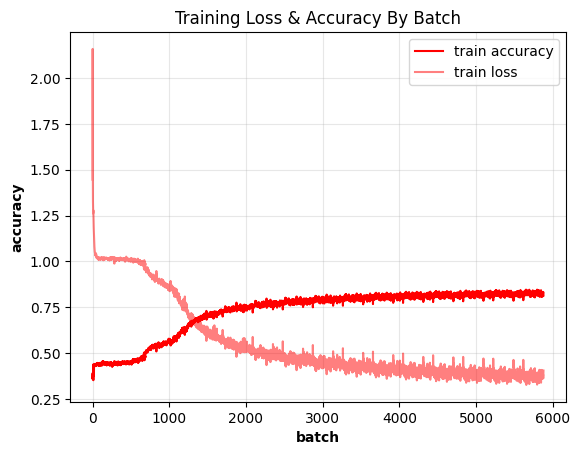

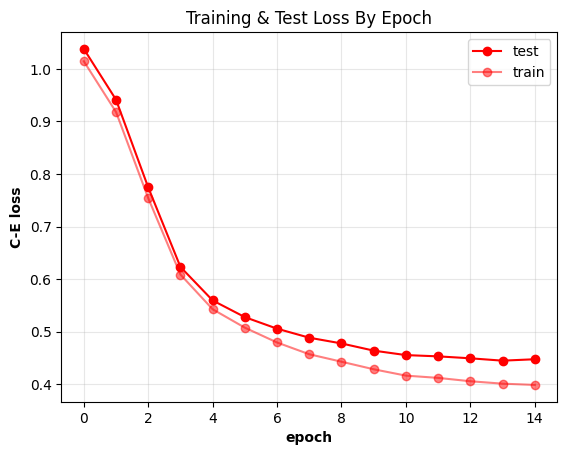

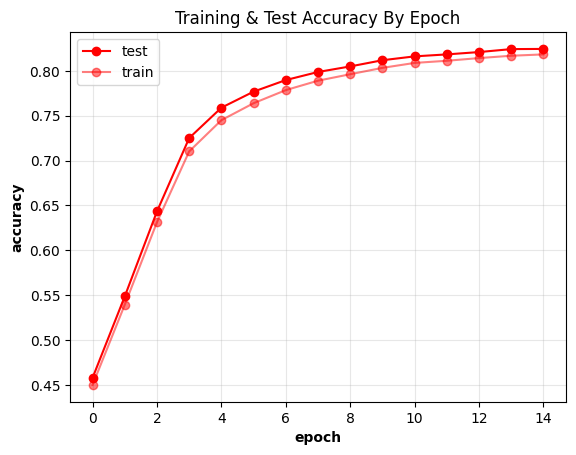

In [2]:
from data.data import createBatchTensor
from model.GPT import transformerModel
from config import modelConfigMorse

configm = modelConfigMorse()
train_m, test_m = createBatchTensor(train_pct, configm)

model_morse = transformerModel(configm)
model_morse.to(device)

model_morse.trainModel(train_m, test_m)

**Testing the model**

Results have degraded, but look similar enough with slightly more spelling issues and structure issues as expected, as the meaning per token has been decreased by ~1/3. Also some of the strucutre differences is due to morse code destroying information like capital letters and indents.

In [25]:
from data.morseconv import decrypt

print(decrypt(detokenize(model_morse.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=650).tolist()[0], configm)))

TO DIR AGE.
  CRESSIDA.  SHE ASUNDRED SPORT AND TRUTH-
  TALK HEART THIS RATECHE WOMAN, WELL HERE HAD HIS SWORNS,
    HE HATH HIS BRAVESH SUMN'D 'GAINST YOU,
    AND GAME NIGHT WILL WITH FANCEM


**Token Dilution by comparing morse encoded chars vs original chars**

This is the ratio of tokens between the morse LLM and english character LLM. This number represents the average number of tokens needed to represent 1 token in english.

In [26]:
print(model_morse.config.total_tokens/model.config.total_tokens)

3.3376560982285906
